# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_boston = pd.read_csv("boston_house.csv", index_col=0)
boston = df_boston.drop('MEDV', axis=1)
target = df_boston.pop('MEDV')

In [3]:
X = boston.values
y = target.values

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [11]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 12ms/step - loss: 564.6672 - mae: 21.9843 - mse: 564.6672 - val_loss: 565.3780 - val_mae: 21.5266 - val_mse: 565.3780
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 530.5060 - mae: 21.1581 - mse: 530.5060 - val_loss: 527.2258 - val_mae: 20.5810 - val_mse: 527.2258
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 487.5713 - mae: 20.0699 - mse: 487.5713 - val_loss: 476.5065 - val_mae: 19.2351 - val_mse: 476.5065
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 430.5456 - mae: 18.5090 - mse: 430.5456 - val_loss: 409.5055 - val_mae: 17.3576 - val_mse: 409.5055
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 356.6461 - mae: 16.3029 - mse: 356.6461 - val_loss: 327.1280 - val_mae: 14.8840 - val_mse: 327.1280
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 273.2730 - mae: 13.6666 - mse: 273.2730 - val_loss: 242.4070 

12/12 [==============================] - 0s 3ms/step - loss: 25.3598 - mae: 3.3693 - mse: 25.3598 - val_loss: 30.7614 - val_mae: 3.9749 - val_mse: 30.7614
Epoch 50/500
12/12 [==============================] - 0s 3ms/step - loss: 24.9071 - mae: 3.3380 - mse: 24.9071 - val_loss: 29.8185 - val_mae: 3.9663 - val_mse: 29.8185
Epoch 51/500
12/12 [==============================] - 0s 3ms/step - loss: 24.5187 - mae: 3.3529 - mse: 24.5187 - val_loss: 29.3097 - val_mae: 3.9275 - val_mse: 29.3097
Epoch 52/500
12/12 [==============================] - 0s 3ms/step - loss: 24.1546 - mae: 3.2960 - mse: 24.1546 - val_loss: 29.0907 - val_mae: 3.8753 - val_mse: 29.0907
Epoch 53/500
12/12 [==============================] - 0s 3ms/step - loss: 23.9088 - mae: 3.2909 - mse: 23.9088 - val_loss: 28.3589 - val_mae: 3.8551 - val_mse: 28.3589
Epoch 54/500
12/12 [==============================] - 0s 3ms/step - loss: 23.9136 - mae: 3.2195 - mse: 23.9136 - val_loss: 28.1801 - val_mae: 3.8134 - val_mse: 28.1801
Epoch

Epoch 98/500
12/12 [==============================] - 0s 4ms/step - loss: 18.1712 - mae: 2.7749 - mse: 18.1712 - val_loss: 20.6869 - val_mae: 3.2910 - val_mse: 20.6869
Epoch 99/500
12/12 [==============================] - 0s 4ms/step - loss: 18.0961 - mae: 2.7685 - mse: 18.0961 - val_loss: 20.6575 - val_mae: 3.2820 - val_mse: 20.6575
Epoch 100/500
12/12 [==============================] - 0s 3ms/step - loss: 18.2414 - mae: 2.8336 - mse: 18.2414 - val_loss: 20.5060 - val_mae: 3.2809 - val_mse: 20.5060
Epoch 101/500
12/12 [==============================] - 0s 3ms/step - loss: 18.1154 - mae: 2.7605 - mse: 18.1154 - val_loss: 20.8111 - val_mae: 3.2851 - val_mse: 20.8111
Epoch 102/500
12/12 [==============================] - 0s 4ms/step - loss: 18.0200 - mae: 2.7590 - mse: 18.0200 - val_loss: 20.3578 - val_mae: 3.2783 - val_mse: 20.3578
Epoch 103/500
12/12 [==============================] - 0s 3ms/step - loss: 18.0221 - mae: 2.8095 - mse: 18.0221 - val_loss: 20.6736 - val_mae: 3.2723 - val_m

12/12 [==============================] - 0s 3ms/step - loss: 15.5780 - mae: 2.6326 - mse: 15.5780 - val_loss: 17.8538 - val_mae: 3.0177 - val_mse: 17.8538
Epoch 147/500
12/12 [==============================] - 0s 3ms/step - loss: 15.4880 - mae: 2.5393 - mse: 15.4880 - val_loss: 17.7163 - val_mae: 3.0104 - val_mse: 17.7163
Epoch 148/500
12/12 [==============================] - 0s 3ms/step - loss: 15.5251 - mae: 2.6540 - mse: 15.5251 - val_loss: 17.7136 - val_mae: 3.0054 - val_mse: 17.7136
Epoch 149/500
12/12 [==============================] - 0s 3ms/step - loss: 15.2473 - mae: 2.5385 - mse: 15.2473 - val_loss: 17.8117 - val_mae: 3.0154 - val_mse: 17.8117
Epoch 150/500
12/12 [==============================] - 0s 3ms/step - loss: 15.2753 - mae: 2.5784 - mse: 15.2753 - val_loss: 17.6226 - val_mae: 2.9992 - val_mse: 17.6226
Epoch 151/500
12/12 [==============================] - 0s 3ms/step - loss: 15.1908 - mae: 2.5442 - mse: 15.1908 - val_loss: 17.4359 - val_mae: 3.0042 - val_mse: 17.4359


12/12 [==============================] - 0s 3ms/step - loss: 12.7793 - mae: 2.4020 - mse: 12.7793 - val_loss: 15.6912 - val_mae: 2.8843 - val_mse: 15.6912
Epoch 195/500
12/12 [==============================] - 0s 3ms/step - loss: 12.7506 - mae: 2.3711 - mse: 12.7506 - val_loss: 15.6442 - val_mae: 2.8789 - val_mse: 15.6442
Epoch 196/500
12/12 [==============================] - 0s 3ms/step - loss: 12.7649 - mae: 2.3608 - mse: 12.7649 - val_loss: 15.6877 - val_mae: 2.8793 - val_mse: 15.6877
Epoch 197/500
12/12 [==============================] - 0s 3ms/step - loss: 12.6449 - mae: 2.4060 - mse: 12.6449 - val_loss: 15.5852 - val_mae: 2.8768 - val_mse: 15.5852
Epoch 198/500
12/12 [==============================] - 0s 3ms/step - loss: 12.5006 - mae: 2.3593 - mse: 12.5006 - val_loss: 15.6014 - val_mae: 2.8834 - val_mse: 15.6014
Epoch 199/500
12/12 [==============================] - 0s 3ms/step - loss: 12.4684 - mae: 2.3482 - mse: 12.4684 - val_loss: 15.6247 - val_mae: 2.8838 - val_mse: 15.6247


12/12 [==============================] - 0s 3ms/step - loss: 10.6784 - mae: 2.1981 - mse: 10.6784 - val_loss: 14.3198 - val_mae: 2.8261 - val_mse: 14.3198
Epoch 243/500
12/12 [==============================] - 0s 3ms/step - loss: 10.6121 - mae: 2.2204 - mse: 10.6121 - val_loss: 14.2373 - val_mae: 2.8180 - val_mse: 14.2373
Epoch 244/500
12/12 [==============================] - 0s 3ms/step - loss: 10.7688 - mae: 2.2120 - mse: 10.7688 - val_loss: 14.6022 - val_mae: 2.8518 - val_mse: 14.6022
Epoch 245/500
12/12 [==============================] - 0s 3ms/step - loss: 10.5103 - mae: 2.2241 - mse: 10.5103 - val_loss: 14.1721 - val_mae: 2.8196 - val_mse: 14.1721
Epoch 246/500
12/12 [==============================] - 0s 4ms/step - loss: 10.5175 - mae: 2.1904 - mse: 10.5175 - val_loss: 14.1263 - val_mae: 2.8132 - val_mse: 14.1263
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 10.4153 - mae: 2.1934 - mse: 10.4153 - val_loss: 14.2236 - val_mae: 2.8197 - val_mse: 14.2236


Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 8.9012 - mae: 2.0519 - mse: 8.9012 - val_loss: 13.5222 - val_mae: 2.7821 - val_mse: 13.5222
Epoch 292/500
12/12 [==============================] - 0s 4ms/step - loss: 8.7440 - mae: 2.0268 - mse: 8.7440 - val_loss: 13.5300 - val_mae: 2.7809 - val_mse: 13.5300
Epoch 293/500
12/12 [==============================] - 0s 3ms/step - loss: 8.7945 - mae: 2.0243 - mse: 8.7945 - val_loss: 13.4558 - val_mae: 2.7645 - val_mse: 13.4558
Epoch 294/500
12/12 [==============================] - 0s 3ms/step - loss: 8.8827 - mae: 2.0328 - mse: 8.8827 - val_loss: 13.6309 - val_mae: 2.7870 - val_mse: 13.6309
Epoch 295/500
12/12 [==============================] - 0s 3ms/step - loss: 8.9511 - mae: 2.0701 - mse: 8.9511 - val_loss: 13.6673 - val_mae: 2.7927 - val_mse: 13.6673
Epoch 296/500
12/12 [==============================] - 0s 3ms/step - loss: 8.7575 - mae: 2.0102 - mse: 8.7575 - val_loss: 13.3633 - val_mae: 2.7638 - val_mse: 13.363

12/12 [==============================] - 0s 3ms/step - loss: 8.7760 - mae: 2.1706 - mse: 8.7760 - val_loss: 15.4543 - val_mae: 2.9805 - val_mse: 15.4543
Epoch 341/500
12/12 [==============================] - 0s 3ms/step - loss: 7.8333 - mae: 1.9805 - mse: 7.8333 - val_loss: 13.3704 - val_mae: 2.7911 - val_mse: 13.3704
Epoch 342/500
12/12 [==============================] - 0s 4ms/step - loss: 7.7823 - mae: 1.9962 - mse: 7.7823 - val_loss: 14.1833 - val_mae: 2.8464 - val_mse: 14.1833
Epoch 343/500
12/12 [==============================] - 0s 4ms/step - loss: 7.7404 - mae: 1.9457 - mse: 7.7404 - val_loss: 13.3392 - val_mae: 2.7679 - val_mse: 13.3392
Epoch 344/500
12/12 [==============================] - 0s 4ms/step - loss: 7.6187 - mae: 1.9509 - mse: 7.6187 - val_loss: 13.5584 - val_mae: 2.7826 - val_mse: 13.5584
Epoch 345/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5554 - mae: 1.9245 - mse: 7.5554 - val_loss: 13.1909 - val_mae: 2.7544 - val_mse: 13.1909
Epoch 346/50

12/12 [==============================] - 0s 4ms/step - loss: 7.0175 - mae: 1.8952 - mse: 7.0175 - val_loss: 13.4952 - val_mae: 2.7897 - val_mse: 13.4952
Epoch 390/500
12/12 [==============================] - 0s 3ms/step - loss: 6.9178 - mae: 1.8861 - mse: 6.9178 - val_loss: 13.4001 - val_mae: 2.7770 - val_mse: 13.4001
Epoch 391/500
12/12 [==============================] - 0s 3ms/step - loss: 6.9124 - mae: 1.8928 - mse: 6.9124 - val_loss: 13.6154 - val_mae: 2.7992 - val_mse: 13.6154
Epoch 392/500
12/12 [==============================] - 0s 3ms/step - loss: 7.1053 - mae: 1.9120 - mse: 7.1053 - val_loss: 13.3910 - val_mae: 2.7813 - val_mse: 13.3910
Epoch 393/500
12/12 [==============================] - 0s 3ms/step - loss: 6.8564 - mae: 1.8913 - mse: 6.8564 - val_loss: 13.5464 - val_mae: 2.7931 - val_mse: 13.5464
Epoch 394/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2251 - mae: 1.9519 - mse: 7.2251 - val_loss: 13.9838 - val_mae: 2.8387 - val_mse: 13.9838
Epoch 395/50

12/12 [==============================] - 0s 3ms/step - loss: 6.6411 - mae: 1.8822 - mse: 6.6411 - val_loss: 14.0933 - val_mae: 2.8415 - val_mse: 14.0933
Epoch 439/500
12/12 [==============================] - 0s 3ms/step - loss: 6.4040 - mae: 1.8337 - mse: 6.4040 - val_loss: 13.3078 - val_mae: 2.7598 - val_mse: 13.3078
Epoch 440/500
12/12 [==============================] - 0s 4ms/step - loss: 6.3974 - mae: 1.8331 - mse: 6.3974 - val_loss: 14.3752 - val_mae: 2.8717 - val_mse: 14.3752
Epoch 441/500
12/12 [==============================] - 0s 3ms/step - loss: 6.5859 - mae: 1.8638 - mse: 6.5859 - val_loss: 13.6264 - val_mae: 2.7880 - val_mse: 13.6264
Epoch 442/500
12/12 [==============================] - 0s 3ms/step - loss: 6.3963 - mae: 1.8314 - mse: 6.3963 - val_loss: 13.3481 - val_mae: 2.7627 - val_mse: 13.3481
Epoch 443/500
12/12 [==============================] - 0s 3ms/step - loss: 6.4068 - mae: 1.8424 - mse: 6.4068 - val_loss: 13.4405 - val_mae: 2.7682 - val_mse: 13.4405
Epoch 444/50

12/12 [==============================] - 0s 3ms/step - loss: 6.1475 - mae: 1.8283 - mse: 6.1475 - val_loss: 13.4084 - val_mae: 2.7306 - val_mse: 13.4084
Epoch 488/500
12/12 [==============================] - 0s 3ms/step - loss: 6.2317 - mae: 1.8413 - mse: 6.2317 - val_loss: 14.5578 - val_mae: 2.8483 - val_mse: 14.5578
Epoch 489/500
12/12 [==============================] - 0s 3ms/step - loss: 5.9798 - mae: 1.7853 - mse: 5.9798 - val_loss: 13.1292 - val_mae: 2.6941 - val_mse: 13.1292
Epoch 490/500
12/12 [==============================] - 0s 3ms/step - loss: 5.8517 - mae: 1.7721 - mse: 5.8517 - val_loss: 13.7153 - val_mae: 2.7555 - val_mse: 13.7153
Epoch 491/500
12/12 [==============================] - 0s 3ms/step - loss: 5.8645 - mae: 1.7724 - mse: 5.8645 - val_loss: 13.3316 - val_mae: 2.7169 - val_mse: 13.3316
Epoch 492/500
12/12 [==============================] - 0s 3ms/step - loss: 5.9049 - mae: 1.7906 - mse: 5.9049 - val_loss: 13.3914 - val_mae: 2.7261 - val_mse: 13.3914
Epoch 493/50

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[13.258513450622559, 2.707341194152832, 13.258513450622559]

In [13]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 819us/step


In [14]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 13.26
R2 score: 0.87


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

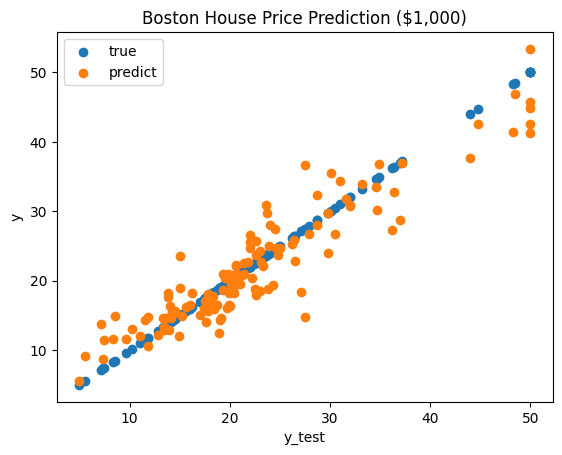

In [15]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

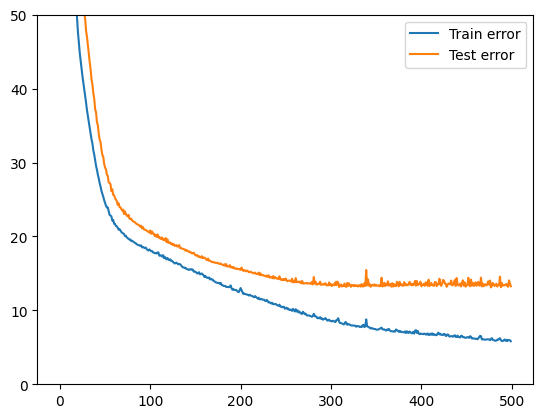

In [16]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [18]:
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-10.89821098   4.39103351   1.00114292   2.85740303  -8.17513561
  20.25159401   0.57863378 -14.71941427   6.9861043   -5.94198831
  -9.7375224    3.5453104  -18.90146647]
Intercept: 
 26.351240968276628


In [21]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 20.77
R2 score: 0.71


In [22]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

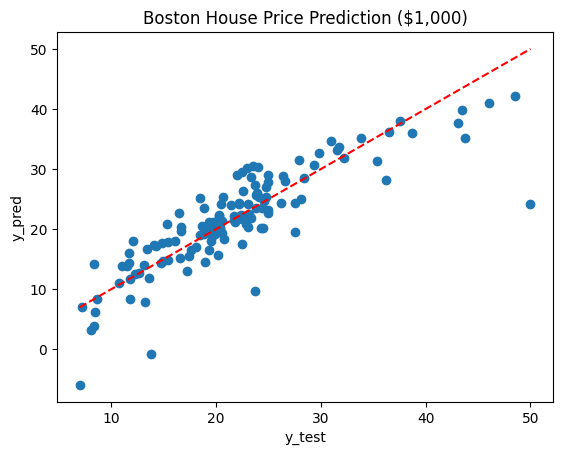

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [25]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화